In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import copy
import matplotlib.pyplot as plt

In [3]:
def CAGR(DF):
    df=DF.copy()
    df["cumreturn"]=(1+df["monret"]).cumprod()
    n=len(df)/252
    CAGR=(df["cumreturn"].tolist()[-1])**(1/n)-1
    return CAGR

def VOL(DF):
    df=DF.copy()
    vol=df["monret"].std()* np.sqrt(252)
    return vol

def sharpe(DF,rf):
    df=DF.copy()
    sr=(CAGR(df)-rf)/VOL(df)
    return sr
    
def max_dd(DF):
    df=DF.copy()
    df["cumreturn"]=(1+df["monret"]).cumprod()
    df["cum_roll_max"]=df["cumreturn"].cummax()
    df["drawdown"]=(df["cum_roll_max"])-df["cumreturn"]
    df["drawdown_pct"] = df["drawdown"]/df["cum_roll_max"]
    max_dd= df["drawdown_pct"].max()
    return max_dd

In [4]:
tickers = [
    "POWERGRID.NS",
    "TITAN.NS",
    "HDFCLIFE.NS",
    "M&M.NS",
    "BPCL.NS",
    "NTPC.NS",
    "BRITANNIA.NS",
    "HEROMOTOCO.NS",
    "BAJAJFINSV.NS",
    "TATAMOTORS.NS",
    "BAJAJ-AUTO.NS",
    "ITC.NS",
    "NESTLEIND.NS",
    "SBIN.NS",
    "CIPLA.NS",
    "HINDUNILVR.NS",
    "COALINDIA.NS",
    "BAJFINANCE.NS",
    "LT.NS",
    "ASIANPAINT.NS",
    "TATACONSUM.NS",
    "INDUSINDBK.NS",
    "TCS.NS",
    "SBILIFE.NS",
    "ONGC.NS",
    "SUNPHARMA.NS",
    "HCLTECH.NS",
    "EICHERMOT.NS",
    "APOLLOHOSP.NS",
    "MARUTI.NS",
    "ICICIBANK.NS",
    "AXISBANK.NS",
    "JSWSTEEL.NS",
    "LTIM.NS",
    "TECHM.NS",
    "KOTAKBANK.NS",
    "RELIANCE.NS",
    "GRASIM.NS",
    "UPL.NS",
    "DIVISLAB.NS",
    "TATASTEEL.NS",
    "WIPRO.NS",
    "ULTRACEMCO.NS",
    "INFY.NS",
    "ADANIENT.NS",
    "BHARTIARTL.NS",
    "DRREDDY.NS",
    "ADANIPORTS.NS",
    "HDFCBANK.NS",
    "HINDALCO.NS"
]


In [8]:
ohlc_mon = {} # directory with ohlc value for each stock            
start = dt.datetime.today()-dt.timedelta(3650)
end = dt.datetime.today()

# looping over tickers and creating a dataframe with close prices
for ticker in tickers:
    ohlc_mon[ticker] = yf.download(ticker,start,end,interval='1mo')
    ohlc_mon[ticker].dropna(inplace=True,how="all")
 
tickers = ohlc_mon.keys() # redefine tickers variable after removing any tickers with corrupted data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [9]:
##Calculatinig monthly return for each ticker 
ohlc_dict=copy.deepcopy(ohlc_mon)
return_df = pd.DataFrame(index=ohlc_dict[ticker].index)
for ticker in tickers:
    print("Calculating monthly return for",ticker)
    ohlc_dict[ticker]["monret"]=ohlc_dict[ticker]["Adj Close"].pct_change()
    return_df[ticker]=ohlc_dict[ticker]["monret"]
    return_df.dropna(inplace=True)

Calculating monthly return for POWERGRID.NS
Calculating monthly return for TITAN.NS
Calculating monthly return for HDFCLIFE.NS
Calculating monthly return for M&M.NS
Calculating monthly return for BPCL.NS
Calculating monthly return for NTPC.NS
Calculating monthly return for BRITANNIA.NS
Calculating monthly return for HEROMOTOCO.NS
Calculating monthly return for BAJAJFINSV.NS
Calculating monthly return for TATAMOTORS.NS
Calculating monthly return for BAJAJ-AUTO.NS
Calculating monthly return for ITC.NS
Calculating monthly return for NESTLEIND.NS
Calculating monthly return for SBIN.NS
Calculating monthly return for CIPLA.NS
Calculating monthly return for HINDUNILVR.NS
Calculating monthly return for COALINDIA.NS
Calculating monthly return for BAJFINANCE.NS
Calculating monthly return for LT.NS
Calculating monthly return for ASIANPAINT.NS
Calculating monthly return for TATACONSUM.NS
Calculating monthly return for INDUSINDBK.NS
Calculating monthly return for TCS.NS
Calculating monthly return f

In [18]:
def pflio(DF,m,x):
    df = DF.copy()
    portfolio = []
    monret = [0]
    for i in range(len(df)):
        if len(portfolio) > 0:
            monret.append(df[portfolio].iloc[i,:].mean())
            bad_stocks = df[portfolio].iloc[i,:].sort_values(ascending=True)[:x].index.values.tolist()
            portfolio = [t for t in portfolio if t not in bad_stocks]
        fill = m - len(portfolio)
        new_picks = df.iloc[i,:].sort_values(ascending=False)[:fill].index.values.tolist()
        portfolio = portfolio + new_picks
        print(portfolio)
    monthly_ret_df = pd.DataFrame(np.array(monret),columns=["monret"])
    return monthly_ret_df


In [19]:
#calculating overall strategy's KPIs
CAGR(pflio(return_df,6,3))
sharpe(pflio(return_df,6,3),0.025)
max_dd(pflio(return_df,6,3)) 

['ADANIENT.NS', 'TECHM.NS', 'TCS.NS', 'COALINDIA.NS', 'LTIM.NS', 'LT.NS']
['TECHM.NS', 'COALINDIA.NS', 'LTIM.NS', 'LTIM.NS', 'HDFCLIFE.NS', 'JSWSTEEL.NS']
['TECHM.NS', 'HDFCLIFE.NS', 'TITAN.NS', 'BAJFINANCE.NS', 'INDUSINDBK.NS', 'DIVISLAB.NS']
['HDFCLIFE.NS', 'BAJFINANCE.NS', 'DIVISLAB.NS', 'TCS.NS', 'M&M.NS', 'LTIM.NS']
['BAJFINANCE.NS', 'M&M.NS', 'LTIM.NS', 'LTIM.NS', 'BAJFINANCE.NS', 'BAJAJFINSV.NS']
['BAJFINANCE.NS', 'M&M.NS', 'BAJFINANCE.NS', 'CIPLA.NS', 'SUNPHARMA.NS', 'DRREDDY.NS']
['BAJFINANCE.NS', 'M&M.NS', 'BAJFINANCE.NS', 'ADANIENT.NS', 'RELIANCE.NS', 'BAJAJFINSV.NS']
['BAJFINANCE.NS', 'BAJFINANCE.NS', 'ADANIENT.NS', 'APOLLOHOSP.NS', 'JSWSTEEL.NS', 'DRREDDY.NS']
['ADANIENT.NS', 'JSWSTEEL.NS', 'DRREDDY.NS', 'WIPRO.NS', 'LTIM.NS', 'BPCL.NS']
['ADANIENT.NS', 'DRREDDY.NS', 'WIPRO.NS', 'ADANIENT.NS', 'ICICIBANK.NS', 'DIVISLAB.NS']
['DRREDDY.NS', 'WIPRO.NS', 'ICICIBANK.NS', 'BPCL.NS', 'MARUTI.NS', 'ADANIPORTS.NS']
['WIPRO.NS', 'BPCL.NS', 'ADANIPORTS.NS', 'BPCL.NS', 'LTIM.NS', 'POW

0.37440295262627177

In [21]:
nifty = yf.download("^NSEI",dt.date.today()-dt.timedelta(3650),dt.date.today(),interval='1mo')
nifty["monret"] = nifty["Adj Close"].pct_change().fillna(0)
CAGR(nifty)
sharpe(nifty,0.025)
max_dd(nifty)

[*********************100%***********************]  1 of 1 completed


0.29343919217321496

['ADANIENT.NS', 'TECHM.NS', 'TCS.NS', 'COALINDIA.NS', 'LTIM.NS', 'LT.NS']
['TECHM.NS', 'COALINDIA.NS', 'LTIM.NS', 'LTIM.NS', 'HDFCLIFE.NS', 'JSWSTEEL.NS']
['TECHM.NS', 'HDFCLIFE.NS', 'TITAN.NS', 'BAJFINANCE.NS', 'INDUSINDBK.NS', 'DIVISLAB.NS']
['HDFCLIFE.NS', 'BAJFINANCE.NS', 'DIVISLAB.NS', 'TCS.NS', 'M&M.NS', 'LTIM.NS']
['BAJFINANCE.NS', 'M&M.NS', 'LTIM.NS', 'LTIM.NS', 'BAJFINANCE.NS', 'BAJAJFINSV.NS']
['BAJFINANCE.NS', 'M&M.NS', 'BAJFINANCE.NS', 'CIPLA.NS', 'SUNPHARMA.NS', 'DRREDDY.NS']
['BAJFINANCE.NS', 'M&M.NS', 'BAJFINANCE.NS', 'ADANIENT.NS', 'RELIANCE.NS', 'BAJAJFINSV.NS']
['BAJFINANCE.NS', 'BAJFINANCE.NS', 'ADANIENT.NS', 'APOLLOHOSP.NS', 'JSWSTEEL.NS', 'DRREDDY.NS']
['ADANIENT.NS', 'JSWSTEEL.NS', 'DRREDDY.NS', 'WIPRO.NS', 'LTIM.NS', 'BPCL.NS']
['ADANIENT.NS', 'DRREDDY.NS', 'WIPRO.NS', 'ADANIENT.NS', 'ICICIBANK.NS', 'DIVISLAB.NS']
['DRREDDY.NS', 'WIPRO.NS', 'ICICIBANK.NS', 'BPCL.NS', 'MARUTI.NS', 'ADANIPORTS.NS']
['WIPRO.NS', 'BPCL.NS', 'ADANIPORTS.NS', 'BPCL.NS', 'LTIM.NS', 'POW

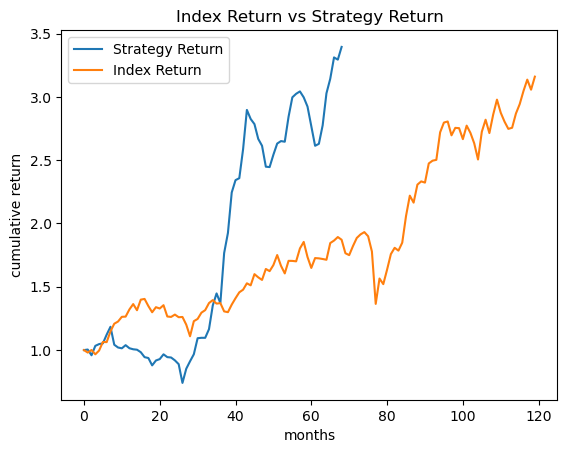

In [22]:
#visualisation
fig,ax=plt.subplots()
plt.plot((1+pflio(return_df,6,3)).cumprod())
plt.plot((1+nifty["monret"].reset_index(drop=True)).cumprod())
plt.title("Index Return vs Strategy Return")
plt.ylabel("cumulative return")
plt.xlabel("months")
ax.legend(["Strategy Return","Index Return"])